In [1]:
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.transform import resize
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from glob import glob
from matplotlib import pyplot as plt
images, hog_images = [], []
X, y = [], []
ppc = 16
sz = 200
for dir in glob('images/visual_images/*'):
    image_files = glob(dir + '/*.png')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = resize(imread(image_file), (sz,sz))
        if len(image.shape) == 2: # if a gray-scale image
            image = gray2rgb(image)
        fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True, multichannel=True)
        images.append(image)
        hog_images.append(hog_image)
        X.append(fd)
        y.append(label)

E:\anaconda\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Conv1 64


C:\Users\minha\AppData\Local\Temp\ipykernel_12544\3956411087.py:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True, multichannel=True)


Conv2 64
Conv3 64
Conv4 64
Conv5 64
Overall_results 0


In [2]:
print(len(images), hog_images[0].shape, X[0].shape, X[1].shape, len(y))

320 (200, 200) (10368,) (10368,) 320


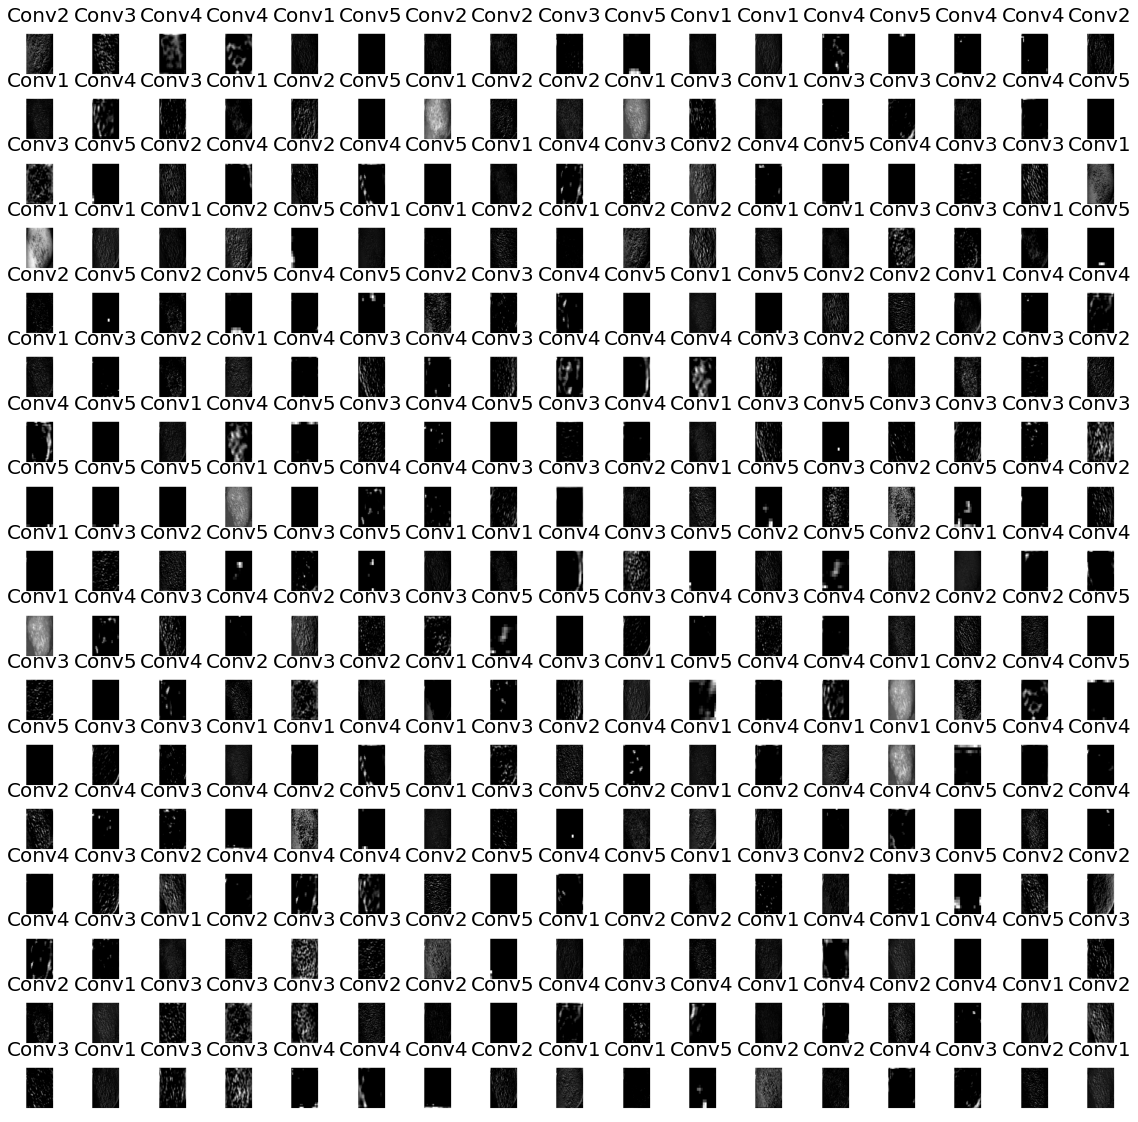

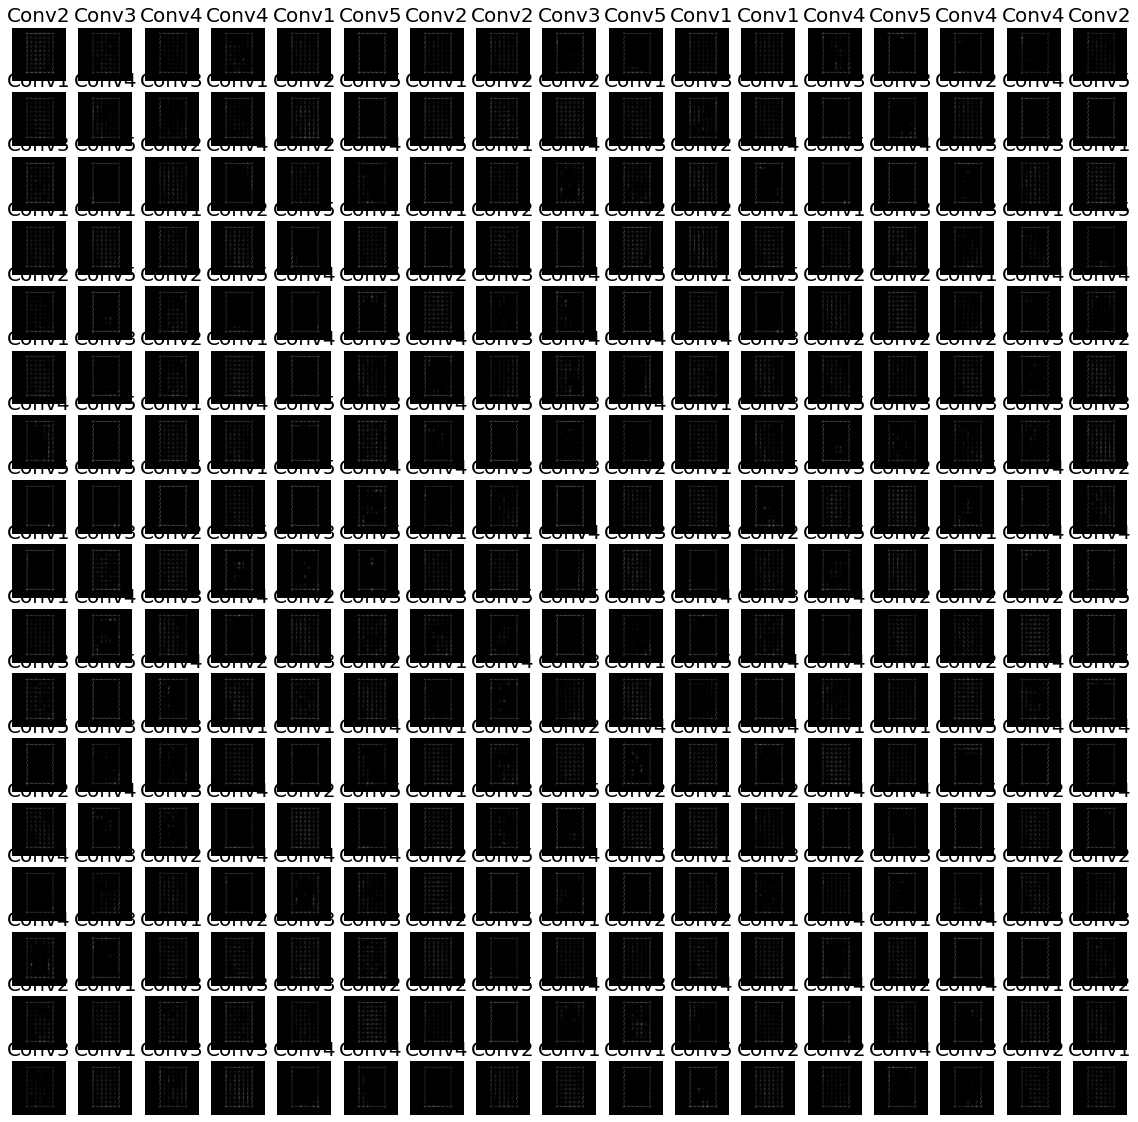

In [3]:
n = 17
indices = np.random.choice(len(images), n*n)
plt.figure(figsize=(20,20))
plt.gray()
i = 1
for index in indices:
    plt.subplot(n,n,i), plt.imshow(images[index]), plt.axis('off'), plt.title(y[index], size=20)
    i += 1
plt.show()
plt.figure(figsize=(20,20))
i = 1
for index in indices:
    plt.subplot(n,n,i), plt.imshow(hog_images[index]), plt.axis('off'), plt.title(y[index], size=20)
    i += 1
plt.show()

In [4]:
X = np.array(X)
y = np.array(y)
indices = np.arange(len(X))
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, indices,
test_size=0.1, random_state=1)
clf = LogisticRegression(C=1000, random_state=0, solver='lbfgs', max_iter=10000 , multi_class='multinomial')
clf.fit(X_train, y_train)


LogisticRegression(C=1000, max_iter=10000, multi_class='multinomial',
                   random_state=0)

In [5]:
y_pred = clf.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print('\n')
# Accuracy: 0.7439024390243902
print(classification_report(y_test, y_pred))

Accuracy: 0.8125


              precision    recall  f1-score   support

       Conv1       0.60      1.00      0.75         3
       Conv2       0.80      0.80      0.80        10
       Conv3       1.00      0.75      0.86         8
       Conv4       0.80      0.80      0.80         5
       Conv5       0.83      0.83      0.83         6

    accuracy                           0.81        32
   macro avg       0.81      0.84      0.81        32
weighted avg       0.84      0.81      0.82        32



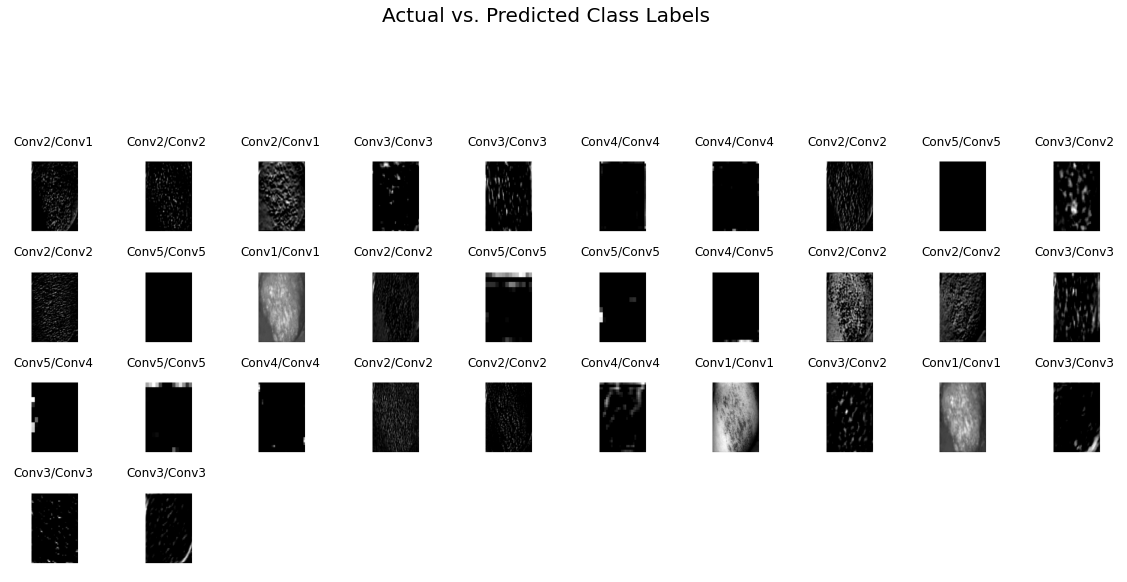

In [6]:
plt.figure(figsize=(20,20))
j = 0
for i in id_test:
    plt.subplot(10,10,j+1), plt.imshow(images[i]), plt.axis('off')
    plt.title('{}/{}'.format(y_test[j], y_pred[j]))
    j+= 1
plt.suptitle('Actual vs. Predicted Class Labels', size=20)
plt.show()